In [20]:
#import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from pandas import DataFrame
from collections import Counter

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [21]:
#read from csv file 
df = pd.read_csv('glass3.csv')

X = df.values[:, 0:9]
y = df.values[:, 9]


In [22]:
print(sorted(Counter(y).items()))

[(0.0, 197), (1.0, 17)]


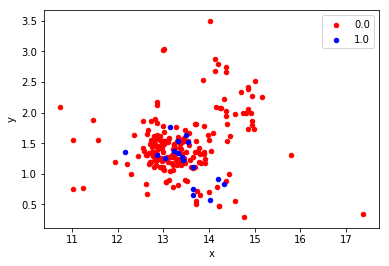

In [23]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,1], y=X[:,3], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

(sampling_strategy='auto', random_state=None, k_neighbors=5, 
m_neighbors='deprecated', out_step='deprecated', kind='deprecated', 
 svm_estimator='deprecated', n_jobs=1, ratio=None)
                                                        

In [24]:
# SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.3, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [25]:
len(X_res)

256

In [26]:
# of examples for each class
print(sorted(Counter(y_res).items()))

[(0.0, 197), (1.0, 59)]


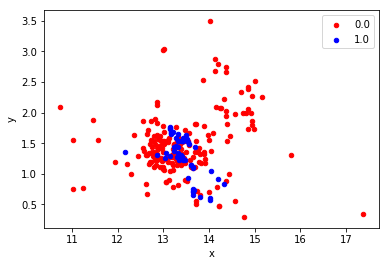

In [27]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,1], y=X_res[:,3], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [28]:
# divide the dataset into training and testing
from sklearn.model_selection import train_test_split

(train_input,test_input,train_classes,test_classes)=train_test_split(X_res,y_res,train_size=0.7,random_state=0)


In [29]:
#  Classification - decision tree
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier()

y_pred = tree.fit(train_input, train_classes).predict(test_input)
#tree.fit(train_input,train_classes)


In [30]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_df = pd.DataFrame(confusion_matrix(test_classes,y_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                 52                  3
Class 1                  5                 17


In [31]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(test_classes, y_pred)

0.89610389610389607

In [32]:
# Percision
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(test_classes,y_pred)))

Precision score: 0.85


In [33]:
# Recall 

from sklearn.metrics import recall_score
print("Recall score: {}".format(recall_score(test_classes,y_pred)))

Recall score: 0.7727272727272727


In [34]:
# F-measure 
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(test_classes,y_pred)))

F1 Score: 0.8095238095238095


In [35]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(test_classes,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93        55
         1.0       0.85      0.77      0.81        22

   micro avg       0.90      0.90      0.90        77
   macro avg       0.88      0.86      0.87        77
weighted avg       0.89      0.90      0.89        77



In [36]:
# Geometric mean score
from imblearn.metrics import geometric_mean_score
print("Geometric score: {}".format(geometric_mean_score(test_classes, y_pred)))

Geometric score: 0.8547388562576842


In [37]:
# ROC_AUC score:
from sklearn.metrics import roc_auc_score
print("ROC AUC Score: {}".format(roc_auc_score(test_classes, y_pred)))

ROC AUC Score: 0.8590909090909091
